# Выполнил:
# Радайкин Артём, ПМ20-4 

## Загружаем данные

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt
import matrixcalc as mc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Эконометрика /МГК_данные.xlsx')
df.head(5)

,№,Страна,X1,X2,X3,X4,X5,X6
0,1,Израиль,80,80,71,88,81,85
1,2,Греция,80,82,57,90,92,79
2,3,Словакия,76,72,47,85,78,93
3,4,Эстония,79,64,46,72,79,85
4,5,Венгрия,83,69,43,88,88,90


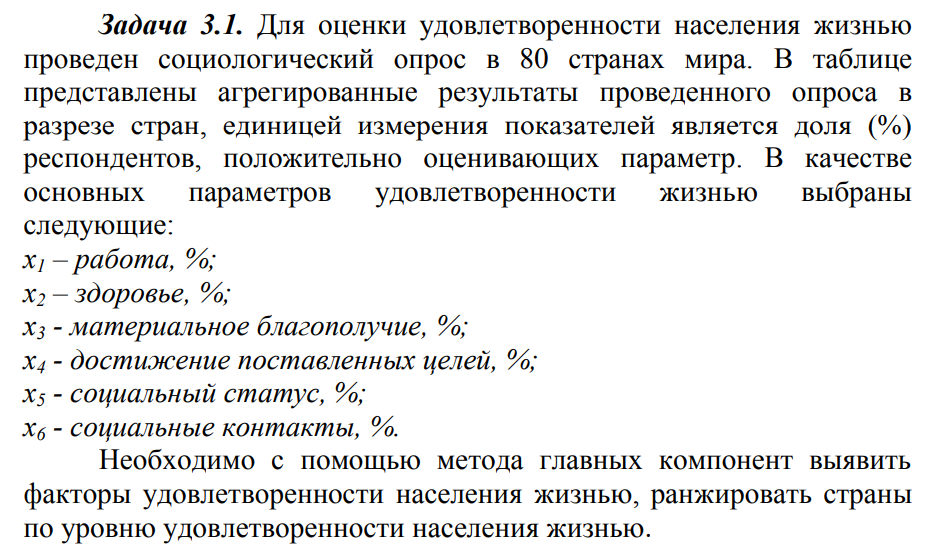

1. Представление исходных данных в виде матрицы Х, размерностью 
n×m, где n - число объектов наблюдения, m - число признаков 
наблюдения;


In [ ]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].values
X.shape

(80, 6)

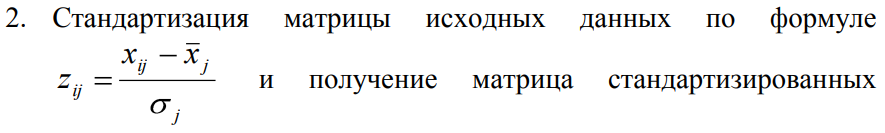

In [ ]:
med = X.mean(axis = 0)
var = X.var(axis = 0) ** 0.5
med, var

(array([69.1875, 73.4625, 46.575 , 90.7   , 82.4   , 76.35  ]),
 array([13.22601012,  9.07598996, 14.240589  ,  6.85273668,  7.37495763,
        10.39362786]))

In [ ]:
Z = (X - med) / var
Z[:5], Z.shape

(array([[ 0.8175179 ,  0.7203071 ,  1.71516782, -0.39400317, -0.1898316 ,
          0.83224069],
        [ 0.8175179 ,  0.94066874,  0.73206242, -0.10214897,  1.30170239,
          0.25496391],
        [ 0.51508353, -0.16113945,  0.02984427, -0.83178448, -0.5966136 ,
          1.60194306],
        [ 0.74190931, -1.04258599, -0.04037754, -2.7288368 , -0.4610196 ,
          0.83224069],
        [ 1.04434367, -0.4916819 , -0.25104299, -0.39400317,  0.7593264 ,
          1.31330467]]), (80, 6))

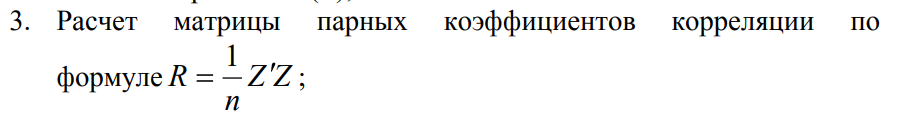

In [ ]:
R = (Z.T @ Z) / 80
R.round(4)

array([[ 1.    ,  0.3653,  0.6233, -0.1733,  0.1547,  0.337 ],
       [ 0.3653,  1.    ,  0.601 ,  0.4359,  0.2437,  0.2181],
       [ 0.6233,  0.601 ,  1.    ,  0.1998,  0.354 ,  0.2274],
       [-0.1733,  0.4359,  0.1998,  1.    ,  0.5079, -0.1472],
       [ 0.1547,  0.2437,  0.354 ,  0.5079,  1.    ,  0.2368],
       [ 0.337 ,  0.2181,  0.2274, -0.1472,  0.2368,  1.    ]])

Собственные значения и вектора

In [ ]:
L, V = np.linalg.eig(R)

L.round(4), V.round(4)

(array([2.5056, 1.4873, 0.8973, 0.6189, 0.2774, 0.2135]),
 array([[ 0.413 ,  0.4792, -0.1875, -0.3598,  0.644 ,  0.1429],
        [ 0.4946, -0.1073, -0.3309,  0.578 ,  0.1084, -0.5371],
        [ 0.5364,  0.1245, -0.2885, -0.2158, -0.7018,  0.2729],
        [ 0.2689, -0.6911, -0.0155,  0.1331,  0.2796,  0.5949],
        [ 0.3832, -0.3457,  0.5379, -0.496 , -0.0102, -0.4451],
        [ 0.2791,  0.3822,  0.6946,  0.4756, -0.0519,  0.2541]]))

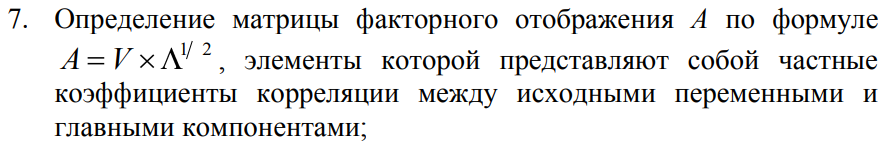

In [ ]:
L_d = np.diag(L.round(2))
A = (V @ (L_d ** 0.5)).round(4)
A

array([[ 0.6543,  0.585 , -0.1779, -0.2833,  0.3408,  0.0655],
       [ 0.7837, -0.131 , -0.3139,  0.4551,  0.0574, -0.2461],
       [ 0.8498,  0.152 , -0.2737, -0.1699, -0.3713,  0.1251],
       [ 0.426 , -0.8436, -0.0147,  0.1048,  0.148 ,  0.2726],
       [ 0.6072, -0.422 ,  0.5103, -0.3905, -0.0054, -0.204 ],
       [ 0.4422,  0.4666,  0.659 ,  0.3745, -0.0275,  0.1164]])

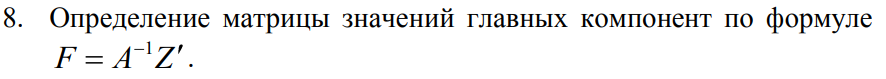

In [ ]:
F = (np.linalg.inv(A) @ Z.T).T.round(4)
F[:10], F.shape

(array([[ 1.0525,  0.9701, -0.4263,  0.2408, -1.4184,  0.5666],
        [ 1.0971,  0.082 ,  0.2141, -0.5669,  0.1127, -1.6673],
        [ 0.0908,  1.3611,  0.7936,  0.8411, -0.0309,  0.7552],
        [-0.5738,  2.3151,  0.6218, -0.7613, -0.7723, -1.2039],
        [ 0.3819,  0.8469,  1.4401, -0.5209,  1.1516,  0.2316],
        [ 1.2055,  0.3639,  0.9909, -0.4528,  1.9954, -0.9175],
        [ 1.0927,  0.8974,  0.9897, -1.0447, -1.1834,  0.1864],
        [ 1.1693,  0.3597,  0.6688, -1.3941, -1.0632,  0.0604],
        [-0.8297,  1.4039,  0.505 , -0.9115,  1.0192, -0.7975],
        [ 0.0944,  1.6077,  0.0361,  1.2751,  0.0573,  0.1864]]), (80, 6))

In [ ]:
factor = F.sum(axis = 1)
df['Удовлетворённость жизнью'] = factor
df.head(5)

,№,Страна,X1,X2,X3,X4,X5,X6,Удовлетворённость жизнью
0,1,Израиль,80,80,71,88,81,85,0.9853
1,2,Греция,80,82,57,90,92,79,-0.7283
2,3,Словакия,76,72,47,85,78,93,3.8109
3,4,Эстония,79,64,46,72,79,85,-0.3744
4,5,Венгрия,83,69,43,88,88,90,3.5312


In [ ]:
pd.set_option('display.max_rows', None)
results = df.sort_values('Удовлетворённость жизнью', ignore_index = True, ascending = False)
results

,№,Страна,X1,X2,X3,X4,X5,X6,Удовлетворённость жизнью
0,28,Ямайка,82,88,50,98,80,91,5.9574
1,33,Таиланд,91,79,63,95,75,82,4.6322
2,3,Словакия,76,72,47,85,78,93,3.8109
3,44,ЮАР,66,79,42,97,83,88,3.6166
4,39,Гана,84,87,64,95,77,84,3.5897
5,18,Казахстан,82,68,51,88,81,88,3.5674
6,5,Венгрия,83,69,43,88,88,90,3.5312
7,32,Шри-Ланка,86,77,58,91,76,82,3.3660
8,10,Хорватия,78,77,48,83,74,90,3.2570
9,6,Португалия,90,80,47,92,93,87,3.1854
